Objective:

Create a multi-layered scatter plot using plotnine that includes marginal histograms to visualize the distribution of two continuous variables.

Instructions
Choose a dataset with at least two continuous variables (e.g., the Iris dataset).
Load your dataset into a pandas DataFrame.
Import the necessary components from plotnine.
Create a scatter plot mapping the two continuous variables to the x and y axes.
Overlay this plot with marginal histograms along both the x and y axes to show the distribution of each variable.
Customize the plot with titles, labels, and a color scheme that enhances data interpretation.
Display the plot.
Expected Learning Outcome:

Develop skills in creating advanced, multi-layered visualizations that combine scatter plots with histograms using plotnine.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
df = pd.read_csv('/content/Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


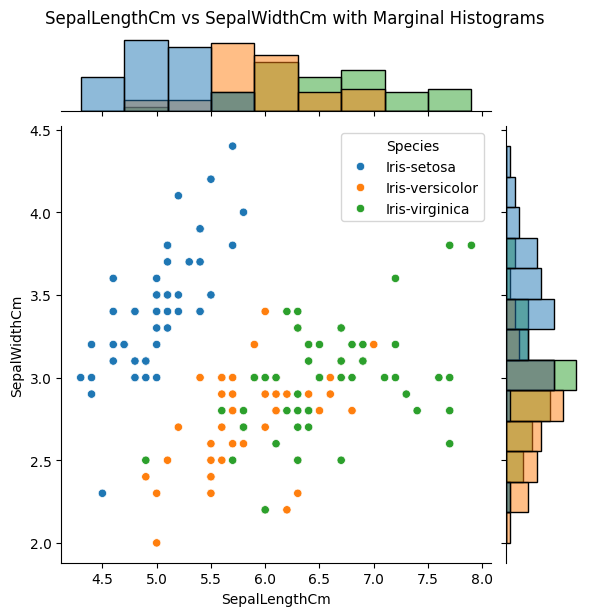

In [11]:
def scatter_with_marginals(data, x, y, hue=None):
    grid = sns.JointGrid(data=data, x=x, y=y, hue=hue)
    grid.plot(sns.scatterplot, sns.histplot)
    grid.fig.suptitle(f"{x} vs {y} with Marginal Histograms", y=1.02)
    grid.ax_joint.set_xlabel(x)
    grid.ax_joint.set_ylabel(y)
    grid.ax_joint.legend(title=hue)
    plt.show()
scatter_with_marginals(df, "SepalLengthCm", "SepalWidthCm", hue="Species")

Objective:

Use plotnine to create an interactive facet grid that displays different types of plots (scatter plot, line plot, etc.) based on a categorical variable in the dataset.

Instructions
Select a dataset with both categorical and continuous variables.
Load the dataset into a pandas DataFrame.
Import plotnine and other necessary libraries.
Create a facet grid that segments your data by the categorical variable.
Within each facet, implement a conditional statement that chooses the type of plot (scatter, line, etc.) based on the specific subset of data.
Ensure interactivity, such as tooltips or hover information, where applicable.
Customize the plot with appropriate titles, axis labels, and a legend.

In [19]:
import plotly.express as px
df = pd.read_csv('/content/Bitcoin_Historical_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3724 non-null   object 
 1   Adj Close  3724 non-null   float64
 2   Close      3724 non-null   float64
 3   High       3724 non-null   float64
 4   Low        3724 non-null   float64
 5   Open       3724 non-null   float64
 6   Volume     3724 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 203.8+ KB


/usr/local/lib/python3.10/dist-packages/plotnine/themes/themeable.py:2426: FutureWarning:

You no longer need to use subplots_adjust to make space for the legend or text around the panels. This parameter will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.



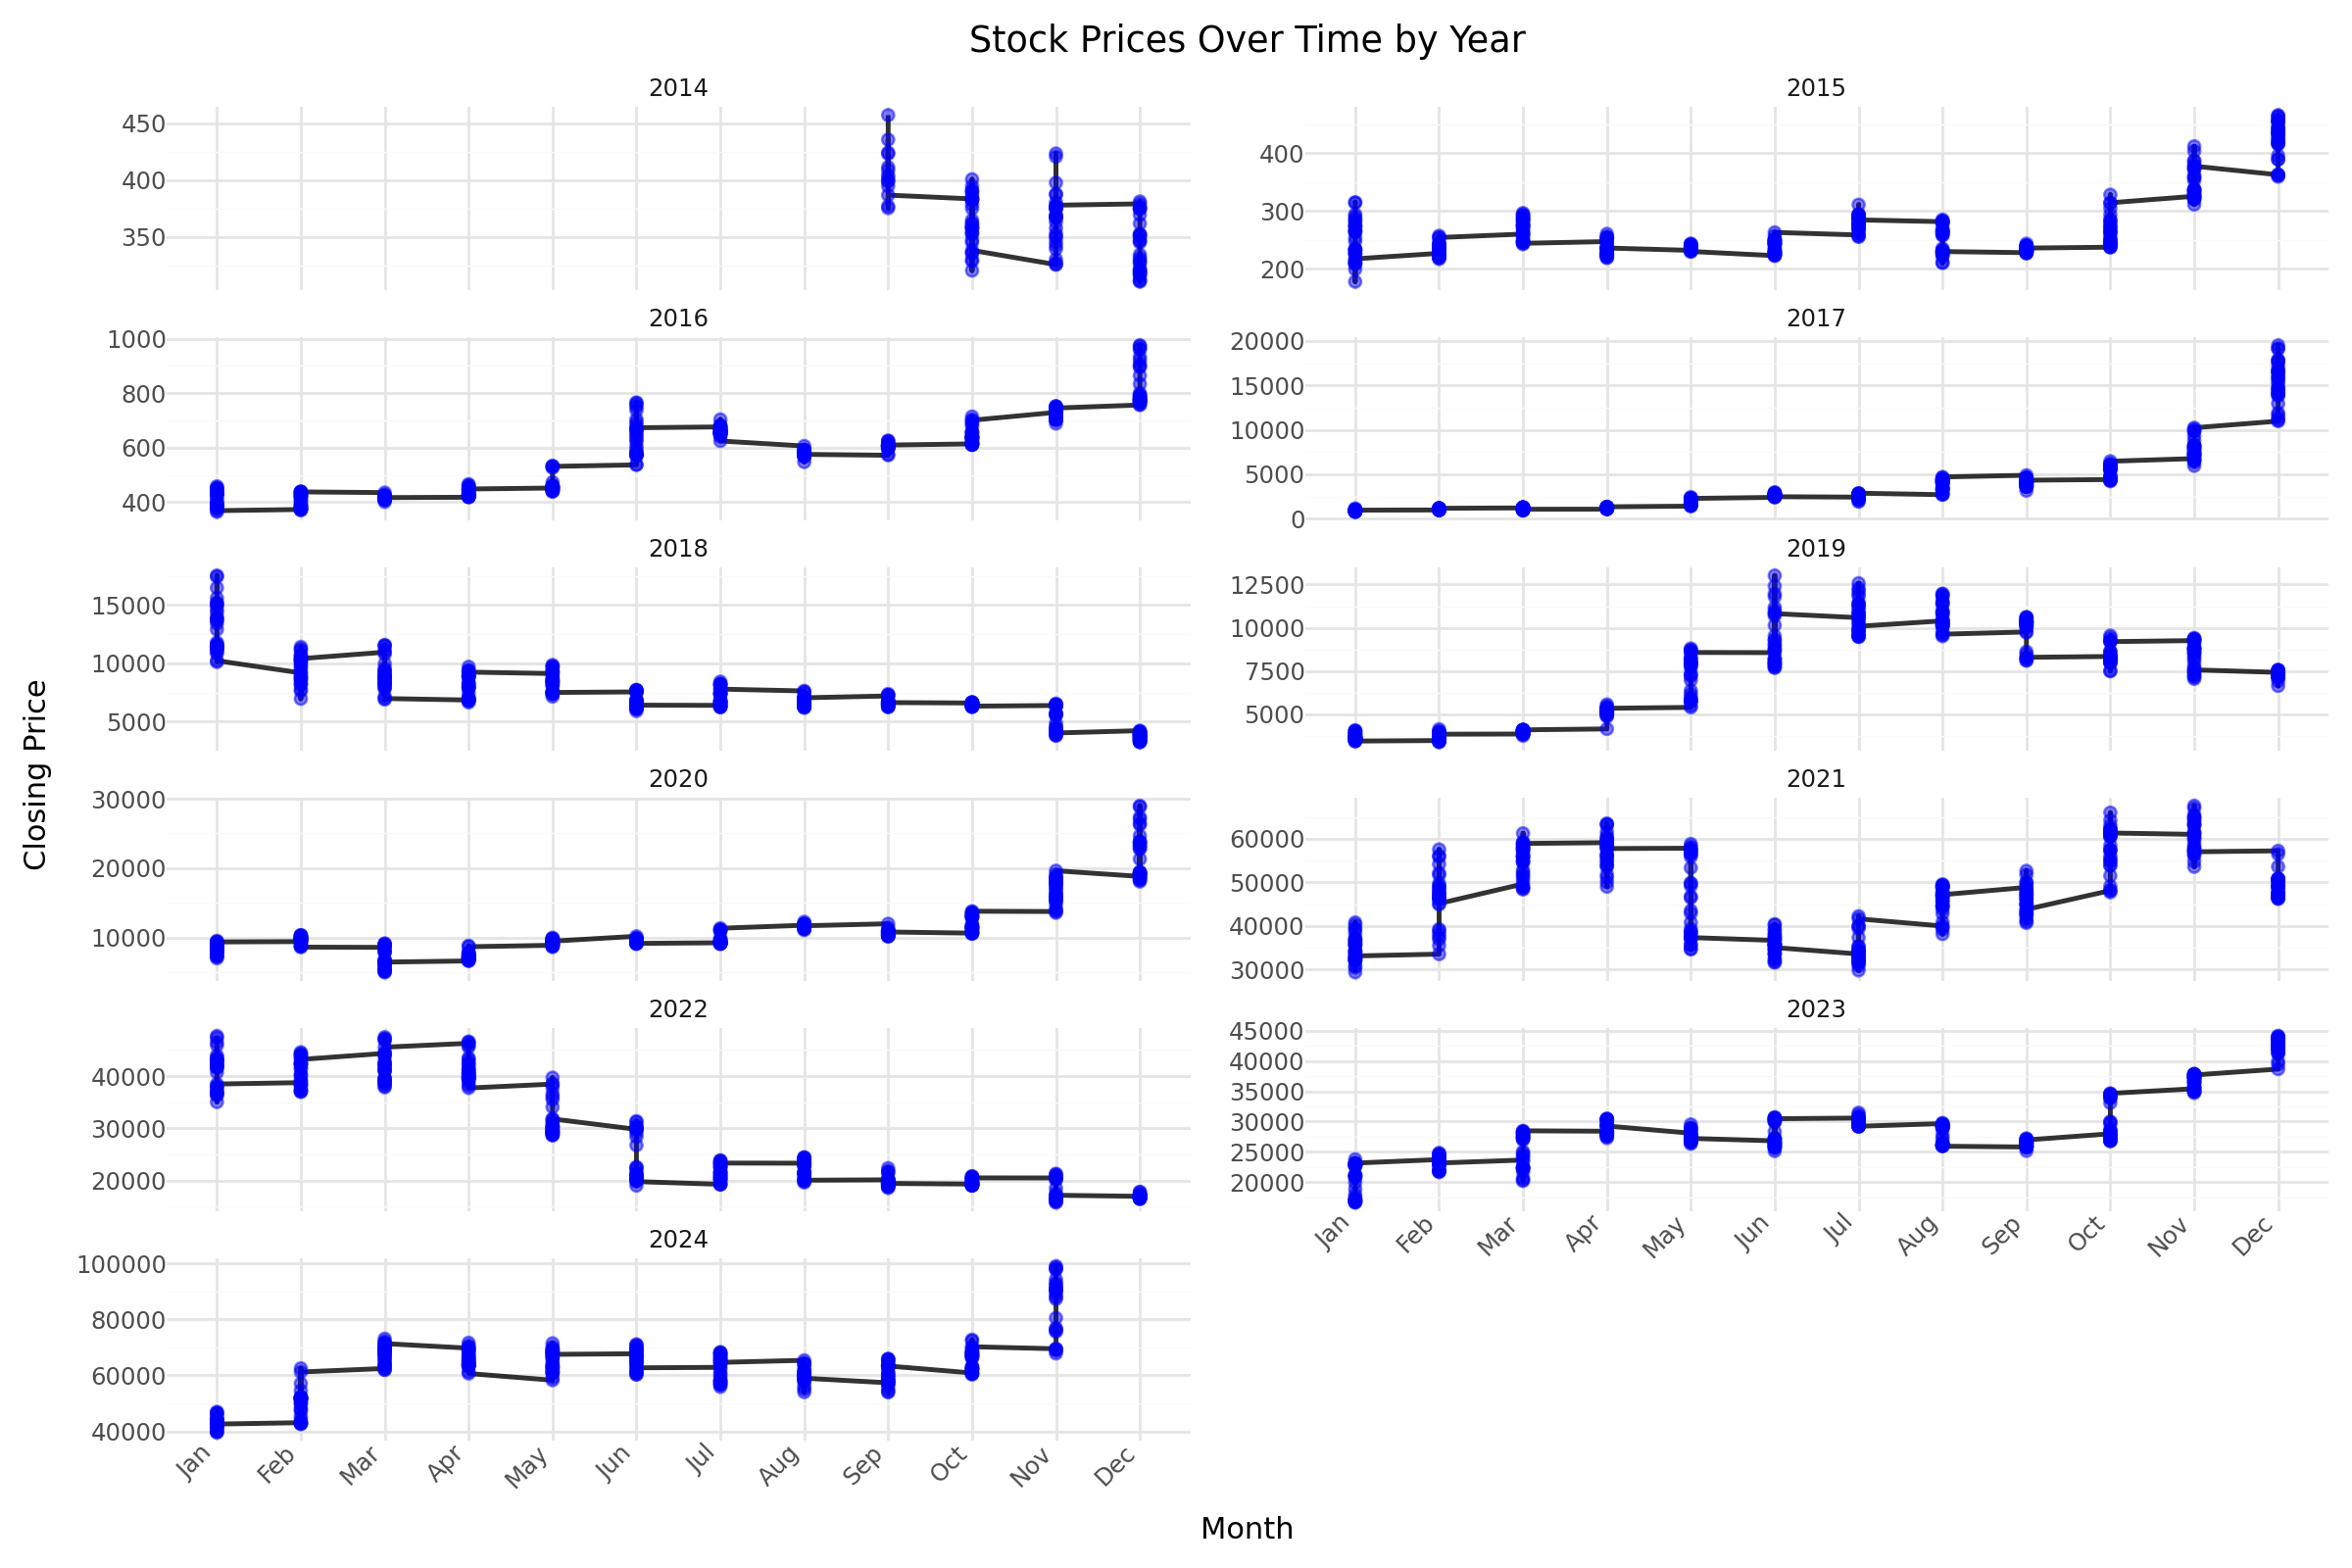

In [44]:
df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%b')
df['Year'] = df['Year'].astype('category')

plot = (
    ggplot(df, aes(x='Month', y='Close'))
    + geom_line(aes(group='Year'), size=1, alpha=0.8)
    + geom_point(size=2, color='blue', alpha=0.5)
    + facet_wrap('Year', scales='free_y', ncol=2)
    + labs(
        title="Stock Prices Over Time by Year",
        x="Month",
        y="Closing Price"
    )
    + theme_minimal()
    + scale_x_discrete(limits=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
    + theme(
        axis_text_x=element_text(rotation=45, ha='right'),
        subplots_adjust={'wspace': 0.2, 'hspace': 0.5},
        figure_size=(12, 8)
    )
)

plot

Objective:

Perform a time series analysis on a dataset using plotnine by plotting rolling averages along with confidence intervals.

Instructions
Choose a time series dataset (e.g., stock market data, temperature over time).
Load the dataset into a pandas DataFrame.
Calculate the rolling average and confidence intervals for a chosen time period.
Import plotnine and other necessary libraries.
Plot the time series data along with the rolling averages.
Add shaded areas to represent confidence intervals around the rolling averages.
Customize your plot with titles, labels, and an intuitive color scheme.

In [51]:
df = pd.read_csv('/content/Average Temperature 1900-2023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            124 non-null    int64  
 1   Average_Fahrenheit_Temperature  124 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:99: PlotnineWarning:

geom_path: Removed 4 rows containing missing values.



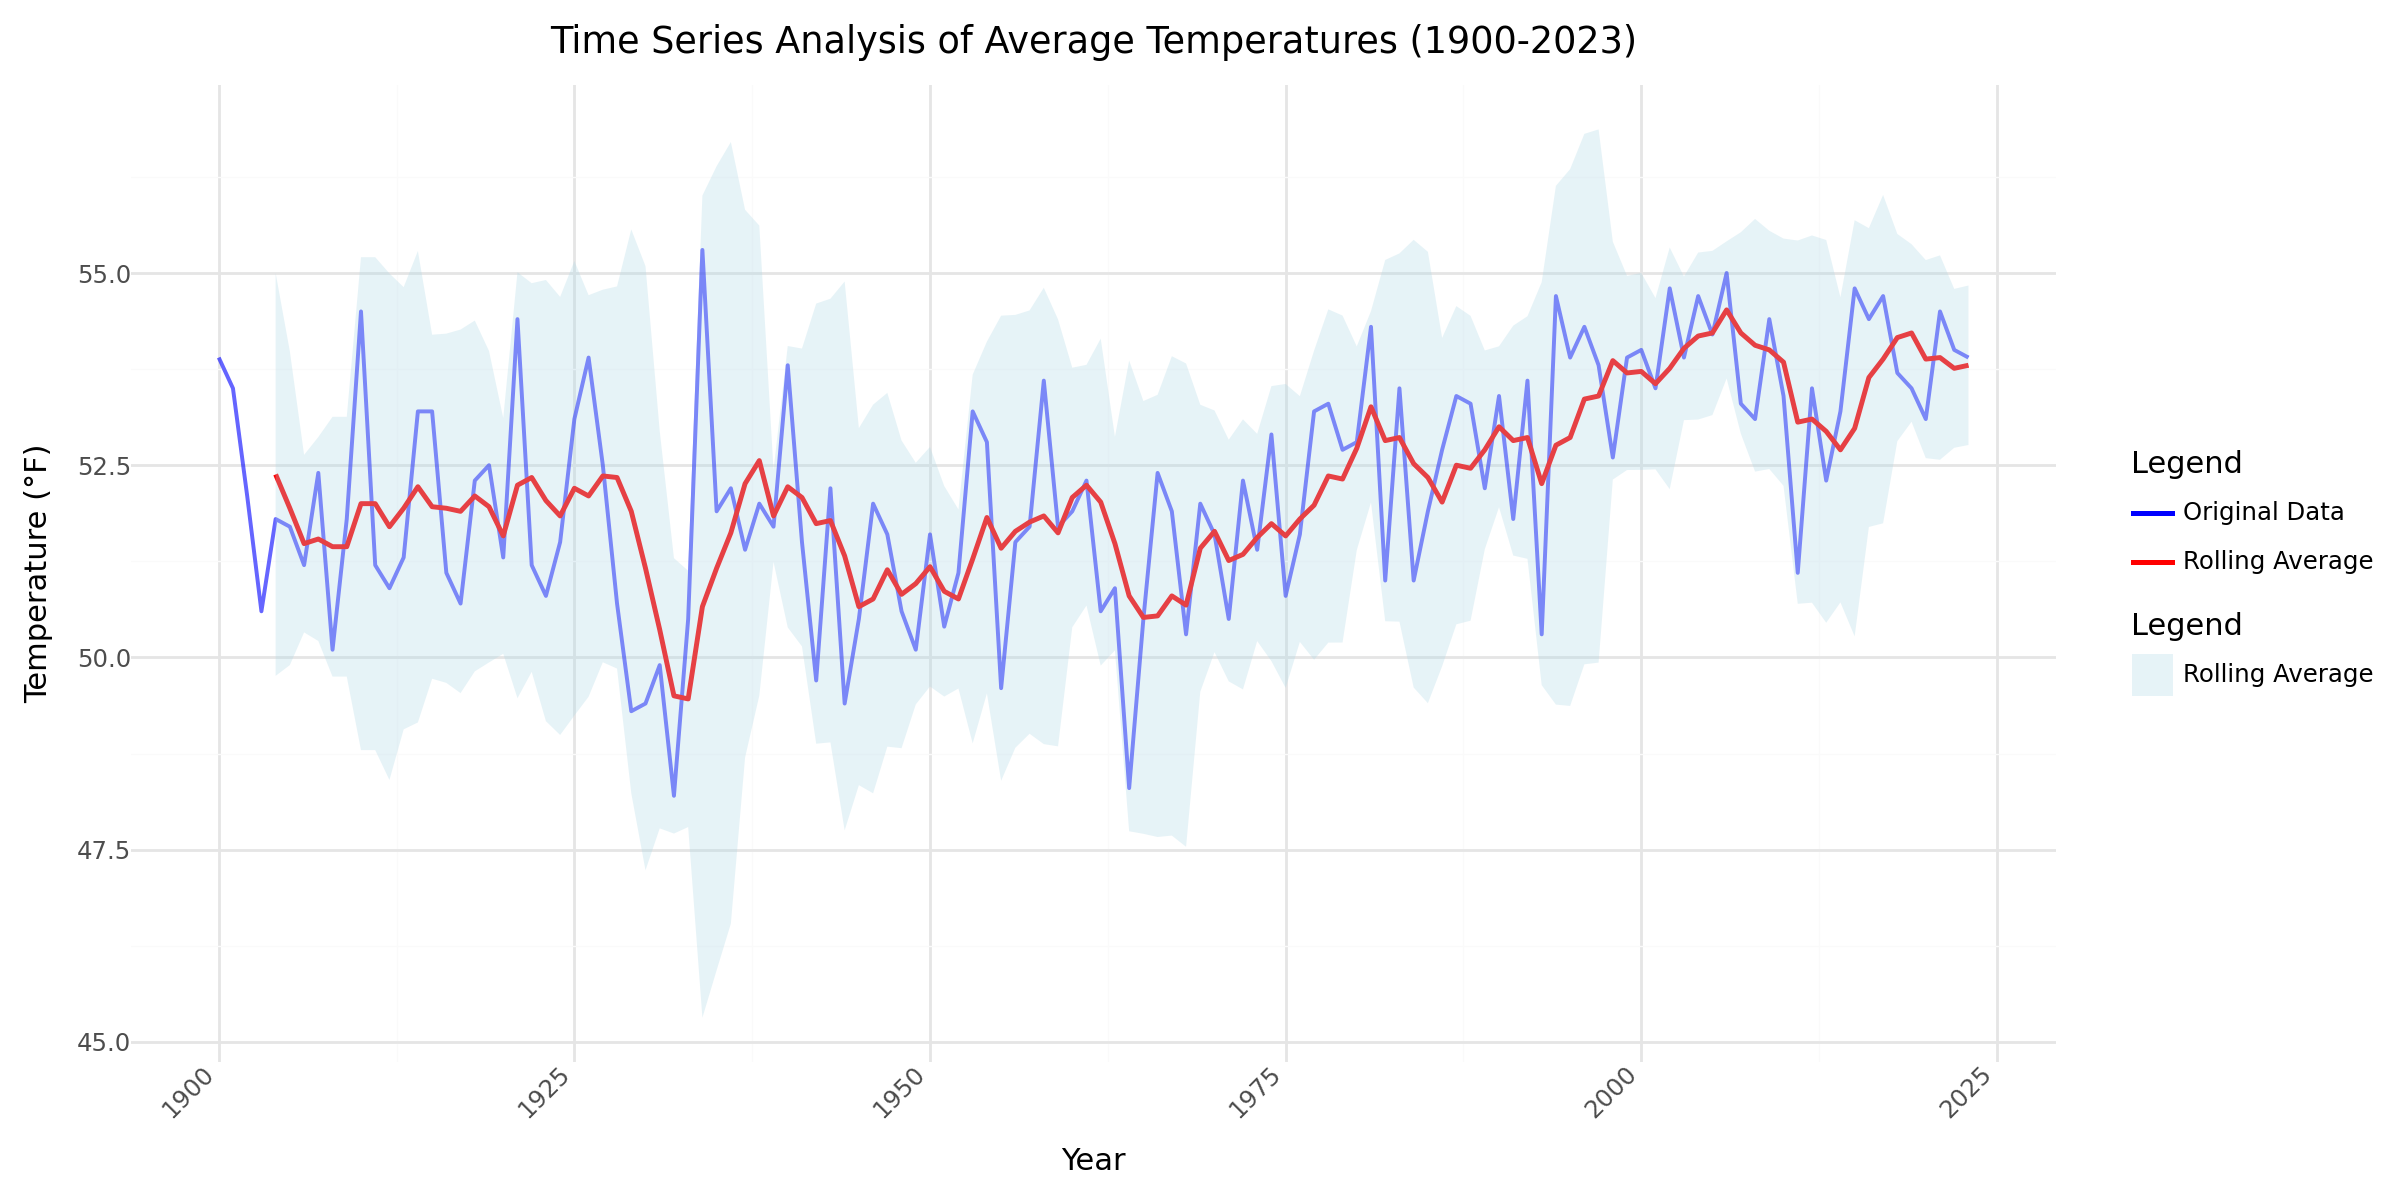

In [59]:
window_size = 5
df['Rolling_Avg'] = df['Average_Fahrenheit_Temperature'].rolling(window=window_size).mean()
df['Rolling_Std'] = df['Average_Fahrenheit_Temperature'].rolling(window=window_size).std()
confidence_multiplier = 1.96
df['CI_Upper'] = df['Rolling_Avg'] + confidence_multiplier * df['Rolling_Std']
df['CI_Lower'] = df['Rolling_Avg'] - confidence_multiplier * df['Rolling_Std']
df['Group'] = 'Original Data'
df['Group_Rolling'] = 'Rolling Average'

# Plot
plot = (
    ggplot(df, aes(x='Year'))
    + geom_line(aes(y='Average_Fahrenheit_Temperature', color='Group'), alpha=0.6, size=0.8)
    + geom_line(aes(y='Rolling_Avg', color='Group_Rolling'), size=1)
    + geom_ribbon(
        aes(ymin='CI_Lower', ymax='CI_Upper', fill='Group_Rolling'),
        alpha=0.3
    )
    + labs(
        title="Time Series Analysis of Average Temperatures (1900-2023)",
        x="Year",
        y="Temperature (°F)",
        color='Legend',
        fill='Legend'
    )
    + scale_color_manual(values={'Original Data': 'blue', 'Rolling Average': 'red'})
    + scale_fill_manual(values={'Rolling Average': 'lightblue'})
    + theme_minimal()
    + theme(
        axis_text_x=element_text(rotation=45, ha='right'),
        figure_size=(12, 6)
    )
)
plot